# Minitrabalho de DAA
Trabalho realizado por:
- Gonçalo Ribeiro, nº 110730
- Rodrigo Leitão, nº 111008

## **1)** Representação dos dados

A tarefa inicial consiste em ler e carregar os dados numa estrutura de dados adequada. Isto implica, essencialmente, em concetualizar a relação ator-filme como um grafo.

Para a sua implementação, deverá usar como base a classe Graph/Digraph fornecida nos exercícios da Semana 7, ou deve implementar a sua classe Graph de raiz. Não é permitida a utilização de outros módulos Python para a representação de grafos.

Com base no conjunto de operações que devem ser suportadas pela sua aplicação (apresentadas na Secção 2), descreva nesta secção os detalhes da estrutura de dados escolhida e o tipo de grafo resultante da sua interpretação do problema. Note que não existe apenas uma "única" representação possível, mas algumas representações podem ser mais/menos eficientes e mais fáceis/difíceis de programar. Você, como desenvolvedor, deve analisar qual será a melhor solução para o problema, mantê-la consistente e fazê-la funcionar.

#### **1.a)** [2 valores] Descreva o modelo de grafo que utilizou para concetualizar a relação ator-filme do problema proposto. Liste quais foram os critérios que levaram à sua decisão e as possíveis vantagens e desvantagens da representação usada.

**Nota:** São listadas abaixo algumas perguntas que devem estar claras na sua resposta:
- O que são os vértices e as arestas no seu modelo de grafo. Qual foi o critério para esta escolha? Por exemplo, a sua escolha facilita a implementação de alguma operação específica? Ou faz
com que as operações fiquem mais eficientes (em relação ao tempo e ao espaço em memória)?
- A sua representação do problema resulta em que tipo de grafo (não orientado, orientado, pesado, com multiarestas, acíclico, cíclico, bipartido, etc)?
- Que tipo de modificações teve de realizar na classe `Graph` fornecida (teve de inserir novos atributos/métodos e porquê?); ou como implementou a sua classe `Graph`?


In [7]:
class Vertex:
    ''' Estrutura de Vértice para um grafo: encapsula um elemento (vertex_id) 
        que é o identificador deste nó.
        
        O elemento (vertex_id) deve ser hashable:  
        - Um objeto hashable é aquele que pode ser utilizado como uma chave num dicionário Python.
        - Isto inclui strings, números, tuplas, etc.
    '''

    def __init__(self, vertex_id):
        '''O vértice será inserido no Grafo usando o método insert_vertex(x) que cria um Vertex'''
        self._vertex_id = vertex_id   # Id do vértice (elemento a inserir no grafo)
        self.status = None            # Marcação de visitado/não visitado (exercício TP3)

    def __hash__(self):
        '''O valor do elemento é usado como hash para o vértice (o elemento deve ser hashable)'''
        return hash(self._vertex_id)  # devolve o hash do elemento

    def __str__(self):
        '''Devolve a representação do objeto vértice em string.'''
        return'v{0}'.format(self._vertex_id)

    def __eq__(self, vertex):
        return self._vertex_id == vertex._vertex_id # Deve-se garantir que: se hash(vertex)==hash(self), entao vertex==self

    def __lt__(self, vertex):
        return self._vertex_id < vertex._vertex_id

    def __le__(self, vertex):
        return self._vertex_id <= vertex._vertex_id

    def __gt__(self, vertex):
        return self._vertex_id > vertex._vertex_id

    def __ge__(self, vertex):
        return self._vertex_id >= vertex._vertex_id

    def vertex_id(self):
        ''' Devolve o elemento guardado neste vértice.'''
        return self._vertex_id

class Edge:
    ''' Estrutura de Aresta para um Grafo: (origem, destino).'''

    def __init__(self, vertex_1, vertex_2, names):
        self._vertex_1 = vertex_1
        self._vertex_2 = vertex_2
        self._names = names

    def __hash__(self):
        # Função que mapeia a aresta a uma posição no dicionário (hash map)
        return hash( (self._vertex_1, self._vertex_2) )

    def __str__(self):
        ''' Devolve a representação do objeto aresta em string: (origem, destino)w=peso '''
        return'e({0};{1})names={2}'.format(self._vertex_1, self._vertex_2, ", ".join(self._names))

    def __eq__(self, other):
        # define igualdade de duas arestas (deve ser consistente com a função hash)
        return self._vertex_1 == other._vertex_1 and self._vertex_2 == other._vertex_2

    def get_names(self):
        ''' Devolve o nome do filme que liga os dois vértices.'''
        return self._names
    
    def endpoints(self):
        ''' Devolve a tupla (vertex_1, vertex_2) os vértices adjacentes vertex_1 e vertex_2.'''
        return (self._vertex_1, self._vertex_2)
    
    def opposite(self, vertex):
        ''' Indica o vértice oposto ao vertex nesta aresta 
            (apenas se vertex fizer parte da aresta).'''
        if vertex == self._vertex_1:
            return self._vertex_2
        elif vertex == self._vertex_2:
            return self._vertex_1
        else:
            return None

class Graph:
    '''
    Representação de um grafo usando dicionários encadeados (nested dictionaries).
    
    Atributos:
    ----------
    adjancencies: Dicionário externo que associa um vértice (Vertex) a um  
                  mapa de adjacências (dicionario interno)
    vertices: Dicionário auxiliar que associa o id dos vértices do grafo
              a um objeto Vertex (tabela de símbolos).
    n: Número de vértices no Grafo
    m: Número de arestas no Grafo
    
    ----------
    '''
    def __init__(self):
        '''Construtor: Cria um grafo vazio (dicionário de _adjancencies).'''
        self._adjancencies = {}           # dicionário que associa o par chave-valor: <Vertex v, Mapa de adjacências de v>
        self._vertices = {}               # dicionário que associa o par: <id do vértice, objeto Vertex correspondente>
        self._single_actor_movies = {}    # conjunto de filmes com apenas um ator
        self._n = 0                       # número de vértices do grafo
        self._m = 0                       # número de arestas do grafo
    
    def __str__(self):
        '''Devolve a representação do grafo em string (toString)'''
        if self._n == 0:
            ret = "DAA-Graph: <empty>\n"
        else:
            ret = "DAA-Graph:\n"
            for vertex in self._adjancencies.keys():
                #ret += "vertex-"
                ret += str(vertex) + ": "
                for edge in self.incident_edges(vertex.vertex_id()):
                    ret += str(edge) + "; "
                ret += "\n"
        return ret
    
    def is_directed(self):
        '''A classe Graph representa um grafo não orientado.'''
        return False
    
    def order(self):
        '''Ordem de um grafo: a quantidade de vértices no Grafo.'''
        return self._n
    
    def size(self):
        '''Dimensão de um grafo: a quantidade total de arestas do Grafo.'''
        return self._m 
    
    def has_vertex(self, vertex_id):
        '''Verifica se o vértice de id vertex_id está no grafo.'''
        return vertex_id in self._vertices
    
    def has_edge(self, u_id, v_id):
        '''Verifica se a aresta (u_id, v_id) existe no grafo.'''
        if not self.has_vertex(u_id) or not self.has_vertex(v_id):
            return False
        else:
            vertex_u = self._vertices[u_id]
            vertex_v = self._vertices[v_id]
            return vertex_v in self._adjancencies[vertex_u]
        
    def has_neighbors(self, vertex_id):
        '''Verifica se o vértice de id vertex_id tem vértices adjacentes (vizinhos).'''
        if not self.has_vertex(vertex_id):
            return False
        return self.degree(vertex_id) == 0
    
    def insert_single_actor_movie(self, movie_name, actor_name):
        '''Insere um novo filme com apenas um ator.'''
        if movie_name not in self._single_actor_movies:
            self._single_actor_movies[actor_name] = [movie_name]
        else:
            self._single_actor_movies[actor_name].append(movie_name)
    
    def insert_vertex(self, vertex_id):
        '''Insere um novo vértice com o id vertex_id.'''
        if not self.has_vertex(vertex_id):
            vertex = Vertex(vertex_id)
            self._vertices[vertex_id] = vertex  # insere o novo vertice no dicionario de vertices
            self._adjancencies[vertex] = {}     # inicializa o mapa de adjacências deste vértice a vazio
            self._n +=1                         # mais um vértice no grafo

    def insert_edge(self, u_id, v_id, edge_name):
        ''' Cria e insere uma nova aresta entre u_id e v_id com peso weight.
            Se a aresta já existe no grafo, atualiza-se o seu peso.
            Também insere os vértices u_id e v_id, caso não existam.'''
        if not self.has_vertex(u_id):
            self.insert_vertex(u_id) # insere novo vertex e atualiza n
        if not self.has_vertex(v_id):
            self.insert_vertex(v_id) # insere novo vertex e atualiza n
        if not self.has_edge(u_id, v_id):
            self._m +=1           # atualiza m apenas se a aresta ainda não existir no grafo
        vertex_u = self._vertices[u_id]
        vertex_v = self._vertices[v_id]
        # Attempt to get the existing edge to add to it
        existing_edge = self._adjancencies.get(vertex_u, {}).get(vertex_v)
        if existing_edge:
            e = Edge(vertex_u, vertex_v, existing_edge.get_names() + [edge_name])
        else:
            e = Edge(vertex_u, vertex_v, [edge_name])

        self._adjancencies[vertex_u][vertex_v] = e  # coloca v nas adjacências de u
        self._adjancencies[vertex_v][vertex_u] = e  # e u nas adjacências de v (para facilitar a procura de todas as arestas incidentes num vértice)
    
    def incident_edges(self, vertex_id):
        '''Devolve um iterável (gerador) com todas as arestas de um vértice com id vertex_id.'''
        vertex = self._vertices[vertex_id]
        for edge in self._adjancencies[vertex].values(): # para todas as arestas incidentes em v:
            yield edge
    
    def degree(self, vertex_id):
        '''Quantidade de arestas incidentes no vértice v.
        '''
        return len(self._adjancencies[self._vertices[vertex_id]])
    
    def get_vertex(self, vertex_id):
        ''' Devolve o objeto Vertex associado ao elemento vertex_id no grafo
        '''
        return None if not self.has_vertex(vertex_id) else self._vertices[vertex_id] 
    
    def get_edge(self, u_id, v_id):
        ''' Devolve o objeto aresta (Edge) que liga u_id a v_id. 
            Devolve None se não forem adjacentes ou se (um d)os vértices não existirem.'''  
        #if u_id not in self._adjancencies or v_id not in self._adjancencies:
        if not self.has_edge(u_id, v_id):
            return None
        else:
            vertex_u = self._vertices[u_id]
            vertex_v = self._vertices[v_id]
            return self._adjancencies[vertex_u][vertex_v]
        
    def get_single_actor_movies(self):
        ''' Devolve o conjunto de filmes com apenas um ator.'''
        all_movies = []
        for movies in self._single_actor_movies.values():
            all_movies.extend(movies)
        return all_movies
    
    def get_single_actor_movies_by_actor(self, actor_name):
        ''' Devolve o conjunto de filmes solo de um determinado ator.'''
        return self._single_actor_movies.get(actor_name, [])
    
    def vertices(self):
        '''Devolve um iterável sobre todos os vértices do Grafo (tipo Vertex)'''
        return self._vertices.values()

    def edges(self):
        '''Devolve um iterável sobre todas as arestas do Grafo (sem arestas duplicadas).'''
        seen = {}      # evita a repetição de arestas no grafo não orientado
        for adj_map in self._adjancencies.values():
            for edge in adj_map.values():
                if edge not in seen:
                    yield edge
                seen[edge] = True
    
    def remove_vertex(self, vertex_id):
        '''Remove o vértice com id vertex_id. Se o vértice não existir, não faz nada.'''
        # Passo 1: remover todas as arestas do vértice dado
        # Passo 2: remover todas as arestas incidentes em vertex_id dos mapas de outros vertices
        # Passo 3: remover o vértice com id vertex_id do grafo
        if self.has_vertex(vertex_id):
            lst_copied = list(self.incident_edges(vertex_id)) # copia para a lista para evitar erros de concorrência (remove enquanto itera na lista)
            for edge in lst_copied:
                x, y = edge.endpoints()
                self.remove_edge(x.vertex_id(),y.vertex_id())  # (Passos 1 e 2)
            del self._adjancencies[self._vertices[vertex_id]]  # (Passo 3 - remove do dicionário de adjacências)
            del self._vertices[vertex_id]                      # (Passo 3 - remove do dicionário de vértices)
            self._n -=1
        
    def remove_edge(self, u_id, v_id):
        '''Remove a aresta entre u_id e v_id. Se a aresta não existir, não faz nada.'''
        if  self.has_edge(u_id, v_id):
            vertex_u = self._vertices[u_id]
            vertex_v = self._vertices[v_id]
            del self._adjancencies[vertex_u][vertex_v]
            if vertex_u != vertex_v:  # laços são removidos apenas uma vez
                del self._adjancencies[vertex_v][vertex_u]
            self._m -=1

Neste modelo, os vértices são os atores e as arestas são a existência de um ou mais filmes em comum entre dois atores. Cada ator é conectado a outros atores através dos filmes em que atuaram juntos. Optou-se por representar os atores e atrizes como vértices, uma escolha intuitiva, pois o objetivo do jogo é encontrar a distância entre um ator/atriz específico (o "centro do universo") e todos os outros atores. As arestas representam a relação entre atores/atrizes que trabalharam juntos em pelo menos um filme. Essa relação é bidirecional, já que se dois atores atuaram juntos, a distância entre eles é a mesma, independentemente de quem seja o "centro do universo".

Como a relação entre atores/atrizes é simétrica (se A atuou com B, então B atuou com A), o grafo será não orientado. Não é um grafo pesado, pois todas as relações têm o mesmo peso (indicam que os atores atuaram juntos em pelo menos um filme). Pode ser um grafo cíclico, pois é possível que um conjunto de atores tenha atuado juntos em mais de um filme

Retirar pesos.

#### **1.b)** [1,5 valores] Implemente uma função auxiliar que irá construir um grafo (do tipo `Graph` implementado) a partir dos dados de um ficheiro .txt fornecido. A função deve receber como argumento o nome do ficheiro e devolver um objeto do tipo `Graph`.

**Nota 1:** Cada linha do ficheiro fornecido apresenta o nome de um filme seguido de uma lista dos atores que participaram no filme. Para separar os nomes que aparecem numa linha, o caracter '/' é utilizado como delimitador.

```
Harry Potter and the Chamber of Secrets (2002)/Davis, Warwick (I)/Knight, Tom (I)/…
Harry Potter and the Goblet of Fire (2005)/Gambon, Michael/Claydon, Steve (II)/…
Harry Potter and the Prisoner of Azkaban (2004)/Phelps, James (I)/Murray, Devon/…
…
```

São anexadas duas bases de dados ao enunciado do projeto:
- `small_dataset.txt`: Contém a lista de filmes classificados no [IMDB](https://www.imdb.com/) em 2011: 4.527 filmes e 122.406 atores (~3,5MB). Deve ser utilizada para realizar testes enquanto implementa a sua API.
- `large_dataset.txt`: Contém todos os filmes do [IMDB](https://www.imdb.com/) em 2011: 285.460 filmes e 933.864 atores (~60MB). Deve ser usada para gerar os resultados dos testes definidos na Secção 3. Note que, para conseguir testar com esta base de dados, terá de ter disponível um espaço de memória RAM suficiente, uma vez que o grafo irá ser todo carregado para a memória.

**Nota 2:** Se achar mais fácil ter esta função implementada na classe `HollywoodOracle` (Secção 2), é livre
de o fazer.

In [8]:
def parseDatabase(filename):
    graph = Graph()

    try:
        with open(filename, "r", encoding="utf8") as file:
            for line in file:
                # Remove the trailing and leading whitespaces and newlines
                lineSplit = line.strip().split("/")
                if len(lineSplit) == 2:
                    graph.insert_single_actor_movie(lineSplit[0], lineSplit[1])
                    graph.insert_vertex(lineSplit[1])
                for i in range(1, len(lineSplit)):
                    for j in range(i + 1, len(lineSplit)):
                        graph.insert_edge(lineSplit[i], lineSplit[j], lineSplit[0])
        return graph
    except FileNotFoundError:
        print("File not found")
        return None

## **2)** API HollywoodOracle
A sua aplicação terá de suportar as operações listadas na API `HollywoodOracle` apresentada abaixo.

#### **2.a)** [1,5 valores] Descreva a estrutura de dados que utilizou para implementar a sua API. Apresente uma análise informal do espaço em memória total utilizado pela sua aplicação. Mais especificamente, indique quanto espaço de memória os atributos da sua classe `HollywoodOracle` ocupam em relação ao número de filmes e atores/atrizes que existem na base de dados analisada.

**Nota:** Em relação ao espaço em memória, deve também apresentar uma estimativa do espaço real ocupado pela classe. Para isso, pode utilizar a função getsizeof() do módulo Python sys, e verificar o tamanho dos atributos do grafo construído e também de qualquer outro atributo que componha a sua implementação da classe `HollywoodOracle`.

#### **2.b)** [12 valores] Implemente cada uma das operações listadas na API `HollywoodOracle` abaixo. Para cada operação, deve apresentar uma análise informal da sua complexidade em relação ao tempo e ao espaço extra de memória utilizado (em relação ao número de filmes/atores).

**Nota 1:** Pode haver vários caminhos de distância mínima entre o “centro do universo” e um ator qualquer. Neste trabalho, será suficiente apresentar um destes caminhos.

**Nota 2:** Comece por testar cada um dos métodos com um ficheiro que tenha apenas 5-10 filmes antes de realizar testes na base de dados `small_dataset.txt`, para ter a certeza de que a sua resolução está correta. No relatório, apresente os resultados dos testes que foram realizados para cada método (exceto `all_movies()` e `all_actors()`) usando a base de dados `small_dataset.txt`

| `class HollywoodOracle` | Descrição | Cotação (valores) |
| --- | --- | --- |
| `__init__(filename)` | [construtor] Inicia os atributos definidos para a classe. Recebe o nome do ficheiro (filename) a partir do qual será criada a sua estrutura de grafo.<br>Configura, por defeito, o “centro do universo” como o ator “Bacon, Kevin” e calcula o “número de Bacon” para cada ator existente na base de dados. | 5,0 |
| `all_movies()` | Devolve um iterável com todos os filmes na base de dados. | 0,25 |
| `all_actors()` | Devolve um iterável com todos os atores na base de dados. | 0,25 |
| `movies_from(a)` | Devolve um iterável que lista os filmes em que o ator dado (a) já atuou. | 0,5 |
| `cast_of(m)` | Devolve um iterável com os atores que atuaram num dado filme (m). | 0,5 |
| `set_center_of_universe(x)` | Configura o ator dado (x) como novo “centro do universo” e calcula novamente o “número de X” para cada ator existente na base de dados. | 0,25 |
| `number_of_X(a)` | Devolve o “numero de X” do ator dado (a), considerando o “centro do universo” atual, X. | 0,25 |
| `path_to_X(a)` | Devolve a sequência de filmes e atores que conduzem ao ator “centro do universo”, X (semelhante ao exemplo dado na Fig. 1). <br>**Nota:** Caso devolva apenas a sequência de atores, a cotação sofrerá um desconto de 0,75 valor. | 1,5 |
| `max_number_of_X()` | Devolve: <br>- O "número de X" máximo para os atores existentes na base de dados, excluindo todos os atores que não estão relacionados com o “centro do universo” atual (e cujo “número de X” é infinito). <br>- O número de atores que não estão relacionados com o “centro do universo” atual. | 1,0 |
| `count_number_of_X(n)` | Devolve o número de atores/atrizes com “numero de X” igual ao valor inteiro dado (n). | 1,0 |
| `average_number_of_X()` | Devolve o valor médio do “número de X” para os atores existentes na base de dados, excluindo todos os atores que não estão relacionados com o “centro do universo” atual (e cujo “número de X” é infinito). | 1,5 |


In [9]:
class HollywoodOracle:
	def __init__(self, filename):
		self._graph = parseDatabase(filename)
		self.set_center_of_universe("Bacon, Kevin")
	
	def all_movies(self):
		# Union of movies with only one actor and all movies in the graph
		return  self._graph.get_single_actor_movies() | {name for edge in self._graph.edges() for name in edge.get_names()}
	
	def all_actors(self):
		return {vertex.vertex_id() for vertex in self._graph.vertices()}

	def movies_from(self, actor):
		# Union of solo movies and non-solo movies of an actor
		return set(self._graph.get_single_actor_movies_by_actor(actor)) | {name for edge in self._graph.incident_edges(actor) for name in edge.get_names()}
	
	# TODO testar
	def cast_of(self, movie):
		return {vertex.vertex_id() for vertex in self._graph.vertices() if movie in self.movies_from(vertex.vertex_id())}
	
	def set_center_of_universe(self, actor):
		self._center_of_universe = self._graph.get_vertex(actor)
		queue = [self._center_of_universe]
		self._distances = {self._center_of_universe : 0}

		while queue:
			current_vertex = queue.pop(0)

			for edge in self._graph.incident_edges(current_vertex.vertex_id()):
				opposite_vertex = edge.opposite(current_vertex)
				if opposite_vertex not in self._distances:
					self._distances[opposite_vertex] = self._distances[current_vertex] + 1
					queue.append(opposite_vertex)
	
	def number_of_X(self, actor):
		'''Devolve o número de X de um ator, ou -1 caso o ator não esteja relacionado com o centro, ou não exista'''
		return self._distances.get(self._graph.get_vertex(actor), -1)
	
	# TODO testar mas parece funcionar
	def path_to_X(self, actor):
		if self.number_of_X(actor) == -1:
			return None
		
		current_vertex = self._graph.get_vertex(actor)
		path = [current_vertex.vertex_id()]
		while current_vertex != self._center_of_universe:
			for edge in self._graph.incident_edges(current_vertex.vertex_id()):
				opposite_vertex = edge.opposite(current_vertex)
				if self._distances[opposite_vertex] == self._distances[current_vertex] - 1:
					# First insert the first movie they have in common
					path.insert(0, edge.get_names()[0])
					# Then insert the actor
					path.insert(0, opposite_vertex.vertex_id())
					current_vertex = opposite_vertex
					break
		return path
	
	# TODO testar
	def max_number_of_X(self):
		return max(self._distances.values()), len(self.all_actors() - {vertex.vertex_id() for vertex in self._distances})

	# TODO testar	
	def count_number_of_X(self, n):
		return sum(1 for key in self._distances if self._distances[key] == n)

	# TODO testar - 1,5 valores por isto???
	def average_number_of_X(self):
		return sum(self._distances.values()) / len(self._distances)

## **3)** Testes
#### **3.1)** [1 valor] Usando a base de dados `large_dataset.txt`, implemente um script/função que utiliza a API `HollywoodOracle` e apresenta um histograma do número de atores com o mesmo “número de Bacon” (para todos os “números de Bacon” diferentes de infinito). Considere como o “centro do universo” o ator “Bacon, Kevin”.
**Nota 1:** Para além do gráfico, imprima os resultados encontrados, ou seja, imprima o número de atores com cada “número Bacon” possível (numa linha diferente).

**Nota 2:** Imprima também “número de Bacon” médio encontrado (ou seja, o resultado da operação
`average_number_of_X()`).


In [10]:
import matplotlib.pyplot as plt

apiObjLarge = HollywoodOracle("large_dataset_utf8.txt")

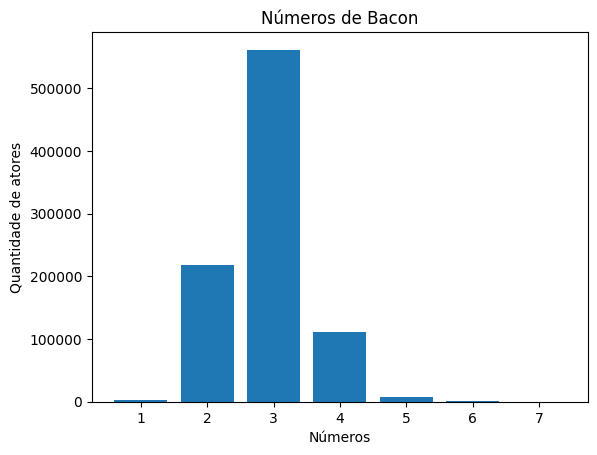

Atores com número de bacon = 0: 2249
Atores com número de bacon = 1: 218085
Atores com número de bacon = 2: 561132
Atores com número de bacon = 3: 111180
Atores com número de bacon = 4: 7906
Atores com número de bacon = 5: 903
Atores com número de bacon = 6: 100
Número médio de bacon: 2.8974954801069246


In [16]:
xAxis = range(1,apiObjLarge.max_number_of_X()[0])
yAxis = [apiObjLarge.count_number_of_X(i) for i in xAxis]
plt.bar(xAxis, yAxis)
plt.title("Números de Bacon")
plt.xlabel("Números")
plt.ylabel("Quantidade de atores")

plt.show()

for index, num in enumerate(yAxis):
	print("Atores com número de bacon = " + str(index + 1) + ": " + str(num))

print("Número médio de bacon: " + str(apiObjLarge.average_number_of_X()))

#### **3.2)** [1 valor] Usando a base de dados `large_dataset.txt`, implemente um script/função que utiliza a API `HollywoodOracle` e apresenta um gráfico do “número de X” médio considerando como o “centro do universo” cada um dos 20 atores mais populares de Hollywood nos anos 2000, segundo o [IMDB](https://www.imdb.com/list/ls096088084/). Ou seja, a função `average_number_of_X` deve ser executada para cada um dos 20 atores de modo a obter o seu “número médio de X”. A lista de atores mais populares encontra-se no ficheiro `top20imbd.csv` anexado.
**Nota 1:** Para além do gráfico, imprima os resultados, ou seja, imprima os valores do “número de X” médio de cada um dos 20 atores (numa linha diferente).

**Nota 2:** Se, por qualquer razão, não for possível executar este teste na base de dados large_dataset.txt, deve justificar a razão do problema e, em alternativa, executar o teste utilizando o ficheiro small_dataset.txt. Só serão aceites justificações sustentadas por factos (por exemplo, capturas de ecrã do erro e/ou tempo de execução).

Número de bacon médio do ator Depp, Johnny: 2.871358851780782
Número de bacon médio do ator Damon, Matt: 2.907931719112215
Número de bacon médio do ator Clooney, George: 2.877270761005801
Número de bacon médio do ator Jolie, Angelina: 2.962805993988265
Número de bacon médio do ator Blanchett, Cate: 2.9758166309881653
Número de bacon médio do ator Bale, Christian: 2.9393857382122297
Número de bacon médio do ator Pitt, Brad: 2.869159355346784
Número de bacon médio do ator DiCaprio, Leonardo: 2.8920117129008287
Número de bacon médio do ator Ledger, Heath: 3.1100114245150126
Número de bacon médio do ator Portman, Natalie: 2.949464822476347
Número de bacon médio do ator Diaz, Cameron: 2.9592200272857347
Número de bacon médio do ator Aniston, Jennifer: 3.0929656044455784
Número de bacon médio do ator Neeson, Liam: 2.8505739986911722
Número de bacon médio do ator Crowe, Russell: 2.9393180784631254
Número de bacon médio do ator Banderas, Antonio (I): 2.8517386337167387
Número de bacon médio do

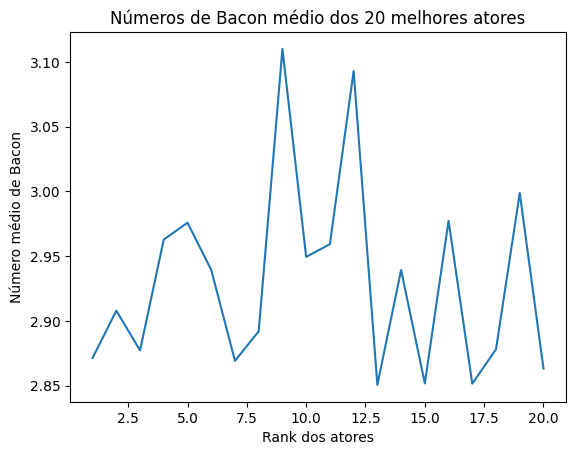

In [11]:
averageNumbers = []
with open("top20imdb.csv", encoding="utf8") as file:
    for line in file:
        rank, actor = line.strip().split(";")
        apiObjLarge.set_center_of_universe(actor)
        numberOfX = apiObjLarge.average_number_of_X()
        print("Número de bacon médio do ator " + actor + ": " + str(numberOfX))
        averageNumbers.append(numberOfX)

plt.plot(range(1, len(averageNumbers) + 1), averageNumbers)
plt.title("Números de Bacon médio dos 20 melhores atores")
plt.xlabel("Rank dos atores")
plt.ylabel("Número médio de Bacon")
plt.show()

#### **3.3)** [1 valor] Se a teoria dos seis graus de separação for verdadeira para Hollywood, isso implicaria que a maioria dos atores terá um “número de X” de 6 ou menos, o que significa que o “número de X” médio seria menor do 6. Para testar esta teoria, implemente um script/função que utiliza a API `HollywoodOracle` com a base de dados `small_dataset.txt`, e apresenta um gráfico do “número de X” médio considerando como o “centro do universo” 1000 atores selecionados de forma aleatória da base de dados.

**Nota:** Este teste pode demorar bastante tempo a ser concluído. Por esta razão, sugerimos que escreva os resultados num ficheiro para que seja possível recuperá-los caso a execução seja interrompida.


In [ ]:
import random

apiObjSmall = HollywoodOracle("small_dataset_utf8.txt")
allActors = apiObjSmall.all_actors()
# TODO count lines and write from there
with open("randomActors_3_3_test.txt", "w") as file:
	for actor in random.sample(allActors, 1000):
		apiObjSmall.set_center_of_universe(actor)
		file.write(actor + ": " + str(apiObjSmall.average_number_of_X()) + "\n")


## 4) Questões Éticas
Tente resolver os problemas apenas com os integrantes do seu grupo antes de colaborar. Escreva as suas respostas por suas próprias palavras. Nunca deve partilhar o ficheiro fonte com as suas soluções com integrantes de outros grupos.
#### 4.a) Se colaborou com alguém fora do seu grupo, indique aqui os respetivos nomes.



#### 4.b) Deve citar todas as fontes que utilizou fora do material da UC.

Qualquer indício de plágio implica, automaticamente, na reprovação na avaliação periódica.
Consoante a gravidade dos indícios de plágio, estes serão apropriadamente investigados e, caso se confirme que um estudante cometeu plágio, este estará automaticamente reprovado à UC.